## Building a CNN to classify images in the CIFAR-10 Dataset

We will work with the CIFAR-10 Dataset.  This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

<ol start="0">
<li> airplane
<li>  automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck
</ol>

For details about CIFAR-10 see:
https://www.cs.toronto.edu/~kriz/cifar.html

For a compilation of published performance results on CIFAR 10, see:
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

---

### Building Convolutional Neural Nets

In this exercise we will build and train our first convolutional neural networks.  In the first part, we walk through the different layers and how they are configured.  In the second part, you will build your own model, train it, and compare the performance.

In [30]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
from utils import load_data

def get_data(num_training=27709, num_validation=1000, num_pub_test=1000, num_pri_test=1000):
    """
    Load the dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test = load_data()
        

    return X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_pub_test, y_pub_test
   del X_pri_test, y_pri_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
#X_train, y_train, X_val, y_val, X_pub_test, y_pub_test, X_pri_test, y_pri_test = get_data()
X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test = get_data()

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
# print('Validation data shape: ', X_val.shape)
# print('Validation labels shape: ', y_val.shape)
print('Public test data shape: ', X_pub_test.shape)
print('Public test labels shape: ', y_pub_test.shape)
print('Private test data shape: ', X_pri_test.shape)
print('Private test labels shape: ', y_pri_test.shape)

Clear previously loaded data.
Train data shape:  (28709, 48, 48)
Train labels shape:  (28709,)
Public test data shape:  (3589, 48, 48)
Public test labels shape:  (3589,)
Private test data shape:  (3589, 48, 48)
Private test labels shape:  (3589,)


In [32]:
X_train[444].shape

(48, 48)

3


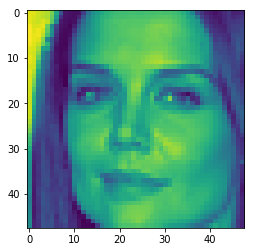

In [33]:
print(y_train[444])
plt.imshow(X_train[444]);

In [34]:
num_classes = 7

y_train = keras.utils.to_categorical(y_train, num_classes)
y_pub_test = keras.utils.to_categorical(y_pub_test, num_classes)
y_pri_test = keras.utils.to_categorical(y_pri_test, num_classes)

In [35]:
y_train[444]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [36]:
# As before, let's make everything float and scale
X_train = X_train.astype('float32')
X_pub_test = X_pub_test.astype('float32')
X_pri_test = X_pri_test.astype('float32')

X_train /= 255
X_pub_test /= 255
X_pri_test /= 255

In [49]:
# Please provide your solution here
# Create model_2 as mentioned in the exercise
# Let's build a CNN using Keras' Sequential capabilities
from keras.layers.normalization import BatchNormalization
from keras import models, layers
#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv1D(6, kernel_size=5, strides=1, activation='relu', input_shape=X_train.shape[1:], padding='same'))

# S2 Pooling Layer
model.add(layers.AveragePooling1D(pool_size=2, strides=1, padding='valid'))

# C3 Convolutional Layer
model.add(layers.Conv1D(16, kernel_size=5, strides=1, activation='relu', padding='valid'))

# S4 Pooling Layer
model.add(layers.AveragePooling1D(pool_size=2, strides=2, padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv1D(120, kernel_size=5, strides=1, activation='relu', padding='valid'))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='relu'))

#Output Layer with softmax activation
model.add(layers.Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 48, 6)             1446      
_________________________________________________________________
average_pooling1d_5 (Average (None, 47, 6)             0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 43, 16)            496       
_________________________________________________________________
average_pooling1d_6 (Average (None, 21, 16)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 17, 120)           9720      
_________________________________________________________________
flatten_3 (Flatten)          (None, 2040)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 84)                171444    
__________

In [56]:
batch_size = 128

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=30,
              validation_data=(X_pub_test, y_pub_test),
              shuffle=True)

Train on 28709 samples, validate on 3589 samples
Epoch 1/30
28709/28709 [==============================] - 6s 194us/step - loss: 1.5753 - acc: 0.3987 - val_loss: 1.5761 - val_acc: 0.3817
Epoch 2/30
28709/28709 [==============================] - 5s 162us/step - loss: 1.4965 - acc: 0.4206 - val_loss: 1.5364 - val_acc: 0.4046
Epoch 3/30
28709/28709 [==============================] - 5s 181us/step - loss: 1.4542 - acc: 0.4369 - val_loss: 1.5402 - val_acc: 0.4079
Epoch 4/30
28709/28709 [==============================] - 5s 168us/step - loss: 1.4147 - acc: 0.4557 - val_loss: 1.4754 - val_acc: 0.4238
Epoch 5/30
28709/28709 [==============================] - 5s 169us/step - loss: 1.3774 - acc: 0.4746 - val_loss: 1.4978 - val_acc: 0.4308
Epoch 6/30
28709/28709 [==============================] - 5s 171us/step - loss: 1.3391 - acc: 0.4883 - val_loss: 1.5110 - val_acc: 0.4288
Epoch 7/30
28709/28709 [==============================] - 5s 164us/step - loss: 1.2955 - acc: 0.5078 - val_loss: 1.5504 - v

In [54]:
score = model.evaluate(X_pri_test, y_pri_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.5891843170268052
Test accuracy: 0.39927556422816973


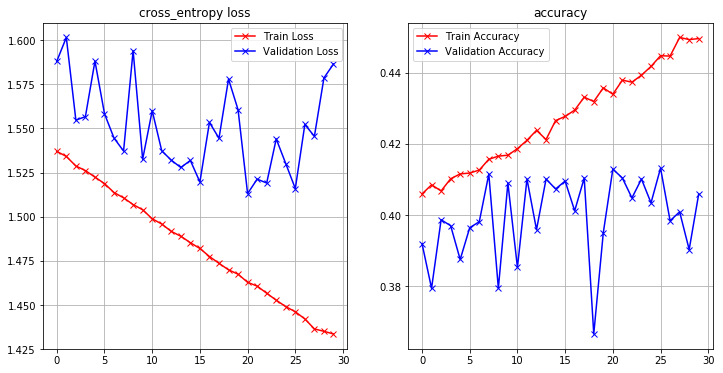

In [55]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

In [41]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model_2).create(prog='dot', format='svg'))